<a href="https://colab.research.google.com/github/sseun43/Audio_classifier/blob/main/Audio_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import numpy as np
import random

In [ ]:
from sklearn import svm

def get_melspectrogram_db(file_path):
  wav,sr = librosa.load(file_path, duration = 5)
  if wav.shape[0]<5*sr:
    wav=np.pad(wav,int(np.ceil((5*sr-wav.shape[0])/2)),mode='reflect')
  else:
    wav=wav[:5*sr]
  spec=librosa.feature.melspectrogram(y=wav, sr=sr)
  spec_db=librosa.power_to_db(spec)
  return spec_db


def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  spec_scaled = spec_scaled.astype(np.uint8)
  return spec_scaled

def get_min_max_normalized_image(images):
  scikit_x = [np.reshape(image, -1)/255 for image in images]
  return scikit_x

In [ ]:
# List of audio files

bus_audio_files = [
    '/content/drive/MyDrive/bus_sounds/bus1.wav',
    '/content/drive/MyDrive/bus_sounds/bus2.wav',
    '/content/drive/MyDrive/bus_sounds/bus3.wav',
    '/content/drive/MyDrive/bus_sounds/bus4.wav',
    '/content/drive/MyDrive/bus_sounds/bus5.wav',
    '/content/drive/MyDrive/bus_sounds/bus6.wav',
    '/content/drive/MyDrive/bus_sounds/bus7.wav',
    '/content/drive/MyDrive/bus_sounds/bus8.wav',
    '/content/drive/MyDrive/bus_sounds/bus9.wav',
    '/content/drive/MyDrive/bus_sounds/bus10.wav',
    '/content/drive/MyDrive/bus_sounds/bus11.wav',
    '/content/drive/MyDrive/bus_sounds/bus12.wav',
    '/content/drive/MyDrive/bus_sounds/bus13.wav',
    '/content/drive/MyDrive/bus_sounds/bus14.wav',
    '/content/drive/MyDrive/bus_sounds/bus15.wav',
    '/content/drive/MyDrive/bus_sounds/bus16.wav',
    '/content/drive/MyDrive/bus_sounds/bus17.wav',
    '/content/drive/MyDrive/bus_sounds/bus18.wav',
    '/content/drive/MyDrive/bus_sounds/bus19.wav',
    '/content/drive/MyDrive/bus_sounds/bus20.wav',
]
metro_audio_files = [
    '/content/drive/MyDrive/metro_sounds/Metro1.m4a',
    '/content/drive/MyDrive/metro_sounds/Metro2.m4a',
    '/content/drive/MyDrive/metro_sounds/Metro3.m4a',
    '/content/drive/MyDrive/metro_sounds/Metro4.m4a',
    '/content/drive/MyDrive/metro_sounds/Metro5.m4a',
    '/content/drive/MyDrive/metro_sounds/Metro6.m4a',
    '/content/drive/MyDrive/metro_sounds/Metro7.m4a',
    '/content/drive/MyDrive/metro_sounds/Metro8.m4a',
    '/content/drive/MyDrive/metro_sounds/Metro9.m4a',
    '/content/drive/MyDrive/metro_sounds/Metro10.m4a',
    '/content/drive/MyDrive/metro_sounds/Metro11.m4a',
    '/content/drive/MyDrive/metro_sounds/Metro12.m4a',
]

# Extract features
X = []
y = []

for file in bus_audio_files:
   mfccs_image = spec_to_image(get_melspectrogram_db(file))
   X.append(mfccs_image)
   y.append(0) # 0 for bus engine

for file in metro_audio_files:
   mfccs_image = spec_to_image(get_melspectrogram_db(file))
   X.append(mfccs_image)
   y.append(1) # 1 for metro engine




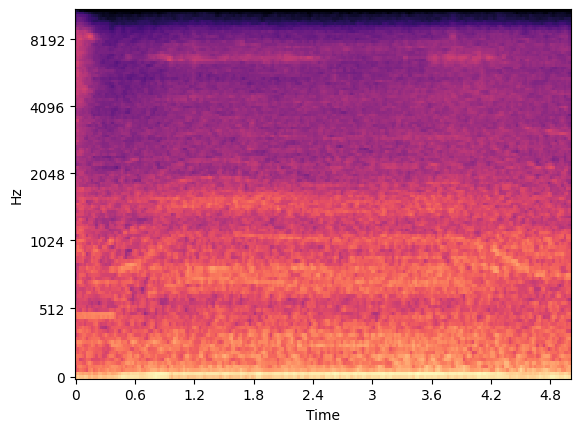

In [ ]:
# Display mel spectogram of bus
librosa.display.specshow(X[0], y_axis='mel', x_axis='time')

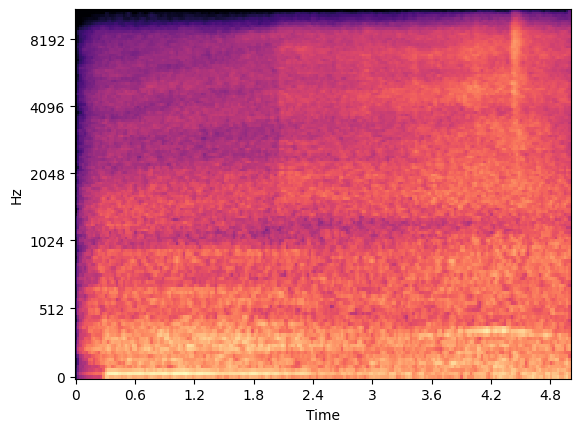

In [ ]:
librosa.display.specshow(X[1], y_axis='mel', x_axis='time')

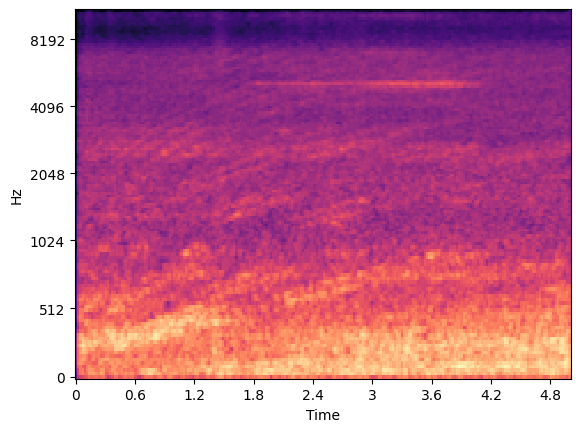

In [ ]:
# Display mel spectogram of metro
librosa.display.specshow(X[-1], y_axis='mel', x_axis='time')

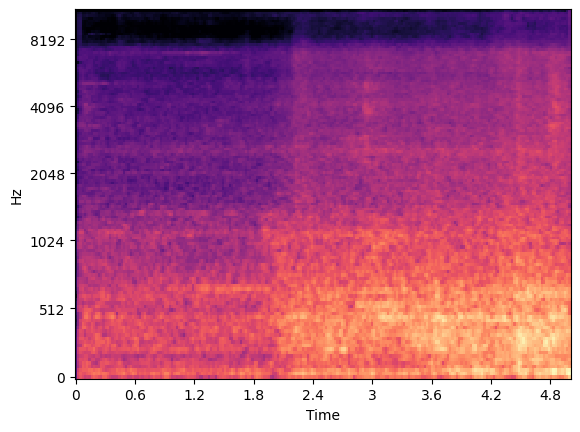

In [ ]:
librosa.display.specshow(X[-2], y_axis='mel', x_axis='time')

In [ ]:
# Make 24 training data
subsetOfX = get_min_max_normalized_image(X[5:-5])
subSetOfY = y[5:-5]

# Make 10 test data
X_test_scaled = get_min_max_normalized_image(X[25:] + X[:5])
y_test = y[25:] + y[:5]


In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = svm.SVC(gamma=0.0006)
# clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(subsetOfX, subSetOfY)

SVC(gamma=0.0006)

In [ ]:
from sklearn.metrics import accuracy_score
print("Base line accuracy on by just choosing mode bus: %f" % accuracy_score([0] * len(y_test), y_test))

Base line accuracy on by just choosing average value of zero for bus: 0.416667


In [ ]:
print("accuracy on training set: %f" % clf.score(subsetOfX, subSetOfY))

accuracy on training set: 0.954545


In [ ]:
print("accuracy on test set: %f" % clf.score(X_test_scaled, y_test))

accuracy on test set: 0.916667
